# Inflorescences

In PalmSim inflorescences are modelled as virtual inflorescences. This is to say that during each simulation run virtual inflorescences initiate, grow, abort, etc. 

### Simulating a single inflorescence

This example takes you a bit under the hood of PalmSim. Namely, we will simulate a single inflorescence.

Since this is a bit un-usual you will be exposed to some Python code which should in fact be still very read-able.

What you will see in this example is the development of an inflorescence from initiation to bunch!

In [1]:
# Make sure we can load PalmSim and it's component from this notebook
import sys
sys.path.append('..')

We now set-up and run a simulation explicitly:

In [6]:
# import standard python libraries
import numpy as np
import pandas as pd

from palmsim import Indeterminate

# make a new indeterminate inflorescence

infl = Indeterminate()
infl._assim_growth = 5

# Duration of the simulation (months)
dur = 50 * 30

# Time-step of update (month)
dt = 0.1 * 30

# Time-steps
steps = np.arange(0, dur, dt)

# Results data
res = {}

# the iterative loop:
for t in steps:

    # update (grow, etc.) the inflorescence a dt-time-step
    infl.update(dt)
    
    # differentiate to a female if necessary
    if (infl.sex =='indeterminate') and (infl.should_differentiate):
        infl = infl.to_female()
    
    # ouput data on the inflorescence
    res[t] = infl.to_comprehensive_dict()
        
df = pd.DataFrame(res).T
df.columns = [x.replace('_',' ') for x in list(df)]

## Let's view the simulation result

### Bunch component mass

First of all, let's consider the mass of the components:

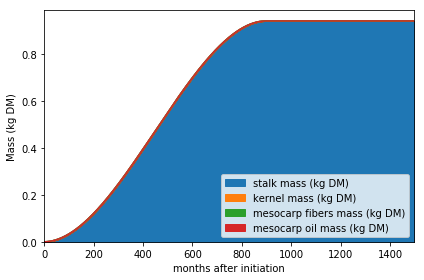

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

f,ax = plt.subplots()

df[['stalk mass (kg DM)',
     'kernel mass (kg DM)',
     'mesocarp fibers mass (kg DM)',
     'mesocarp oil mass (kg DM)']].plot.area(ax=ax)

ax.set_ylabel('Mass (kg DM)')
ax.set_xlabel('months after initiation')

plt.tight_layout()

### Abortion
Notice the two abortion sensitive periods

Text(0.5, 0, 'months after initiation')

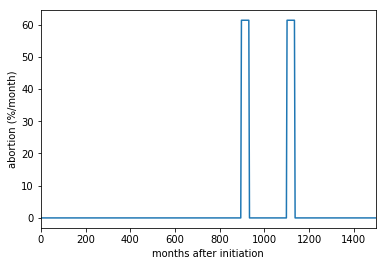

In [10]:
ax = (100*df['abortion fraction (1)']).plot()
ax.set_ylabel('abortion (%/month)')
ax.set_xlabel('months after initiation')

### Assimilation

A peak of assimilation during bunch filling!

Text(0.5, 0, 'days after initiation')

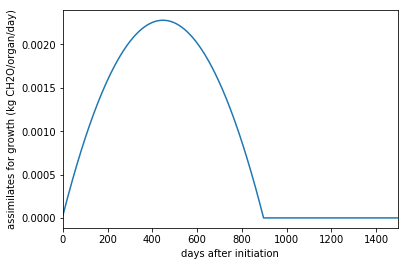

In [14]:
ax = df['assim growth organ (kg CH2O/organ/day)'].plot()
ax.set_ylabel('assimilates for growth (kg CH2O/organ/day)')
ax.set_xlabel('days after initiation')

### Bunch potential

Consider the potential fraction bunches of per cohort over time (also described in Woittiez et al., 2017).

The fraction of inflorescences that become a bunch depends on the female:male sex ratio (month 11), the inflorescence abortion before anthesis (month 30) and the bunch failure after anthesis (month 35).

This is nicely depicted in the following figure.

Text(0, 0.5, 'Potential bunch count')

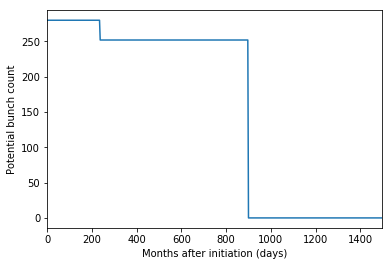

In [17]:
planting_density = 140 # per hectare
inflorescence_initiation_rate = 2 # per palm per month
potential_bunch_count_per_month = planting_density * inflorescence_initiation_rate
(potential_bunch_count_per_month*df['num inflorescences (1/cohort)']).plot()
ax = plt.gca()
ax.set_xlabel('Months after initiation (days)')
ax.set_ylabel('Potential bunch count')

# Conclusion

This concludes this example.